In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\kunal\Downloads\income.csv")
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [3]:
df.shape

(10000, 14)

In [4]:
df.isnull().sum()*100/df.shape[0]

Age                               0.0
Education_Level                   0.0
Occupation                        0.0
Number_of_Dependents              0.0
Location                          0.0
Work_Experience                   0.0
Marital_Status                    0.0
Employment_Status                 0.0
Household_Size                    0.0
Homeownership_Status              0.0
Type_of_Housing                   0.0
Gender                            0.0
Primary_Mode_of_Transportation    0.0
Income                            0.0
dtype: float64

In [5]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype=="O":
        cat.append(i)
    else:
        num.append(i)

In [6]:
cat

['Education_Level',
 'Occupation',
 'Location',
 'Marital_Status',
 'Employment_Status',
 'Homeownership_Status',
 'Type_of_Housing',
 'Gender',
 'Primary_Mode_of_Transportation']

In [7]:
num

['Age', 'Number_of_Dependents', 'Work_Experience', 'Household_Size', 'Income']

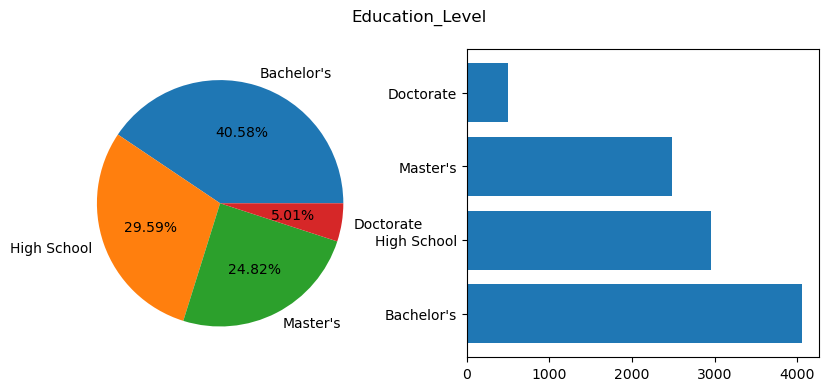

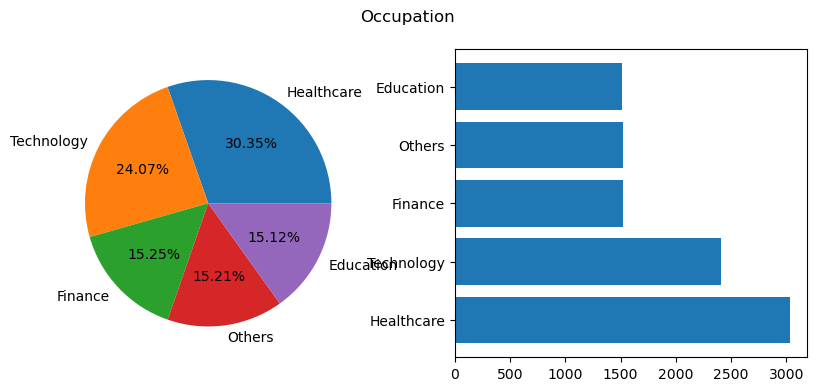

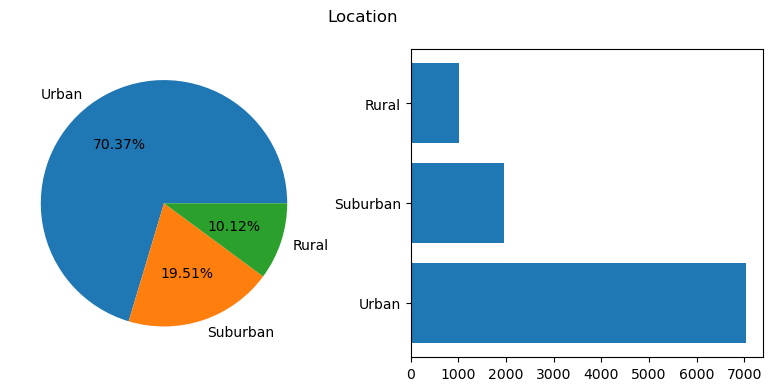

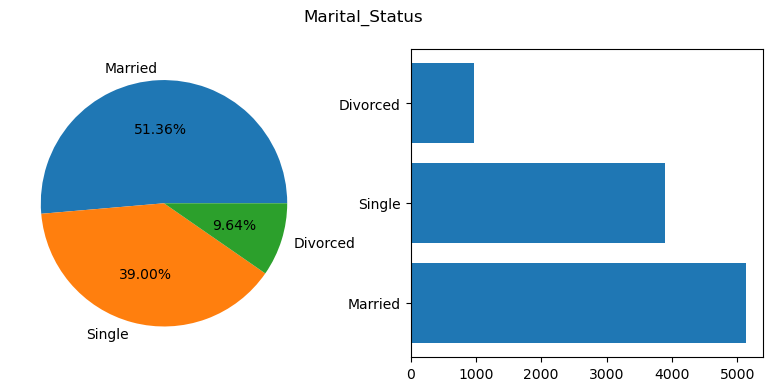

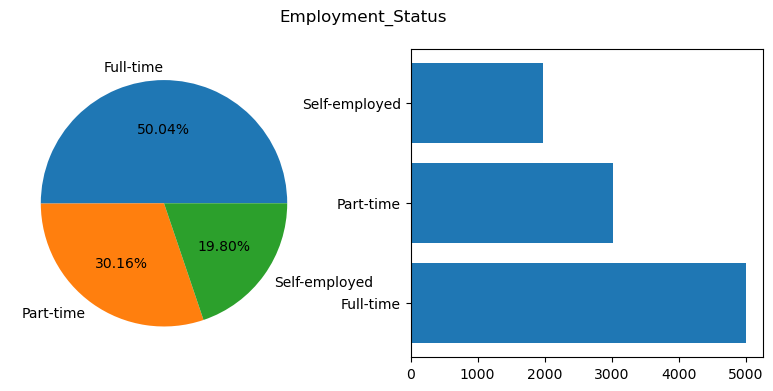

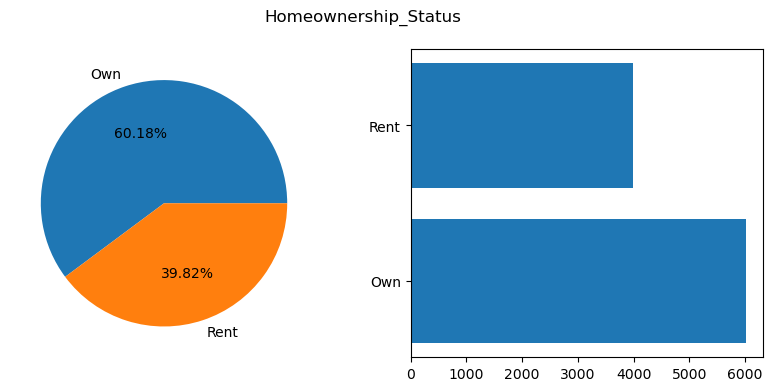

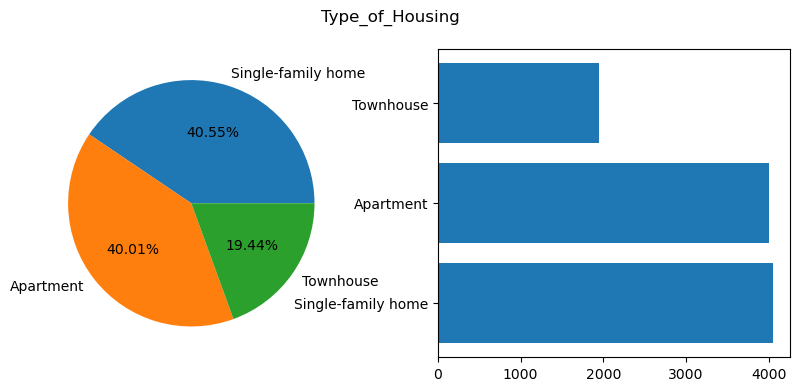

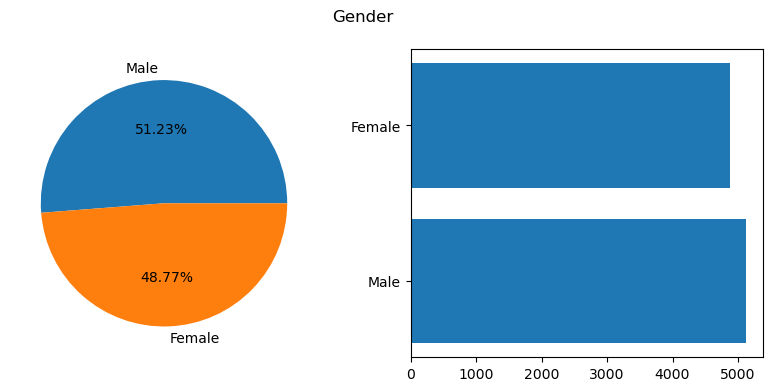

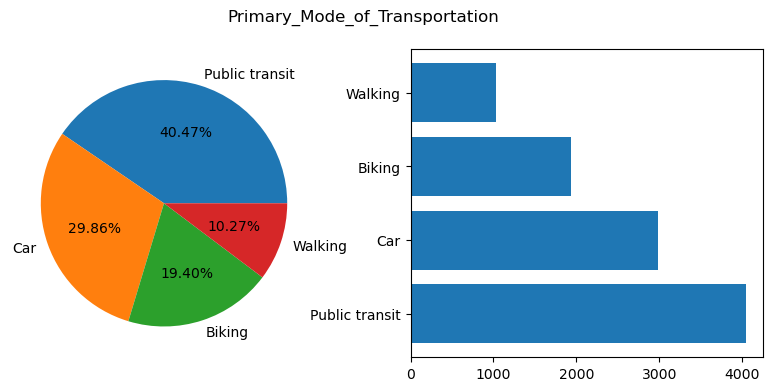

In [8]:
for i in cat:
    fig, ax=plt.subplots(1,2, figsize=(10,4))
    ax[0].pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct="%0.2f%%")
    ax[1].barh(width=df[i].value_counts(), y=df[i].value_counts().index)
    plt.suptitle(i)
    plt.show()

In [9]:
#Location column is imbalanced hence it would have very low variance that wont be contributing towards learning of model
#hence we will remove it

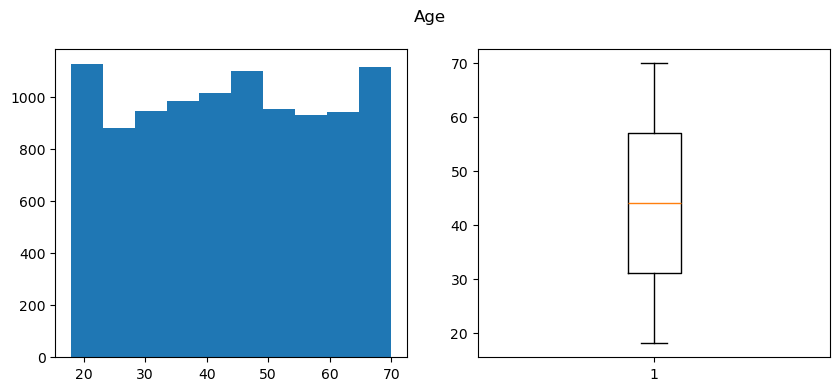

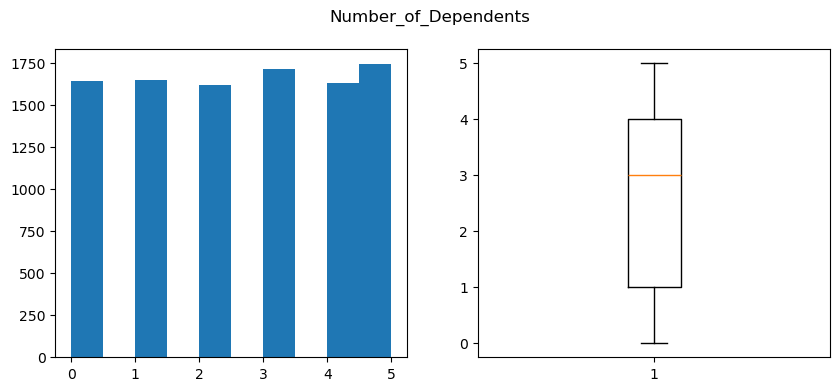

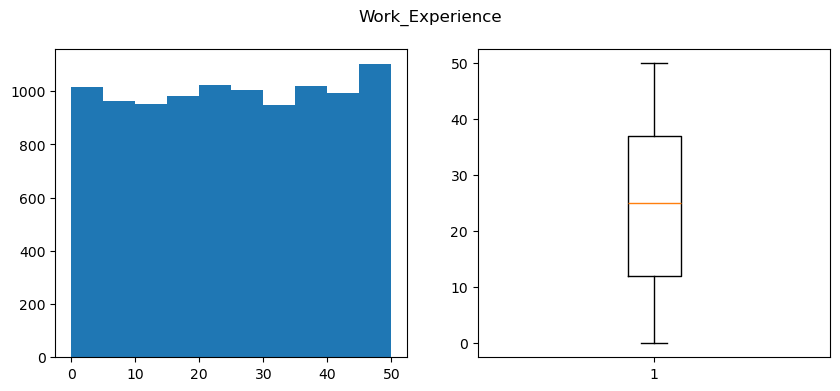

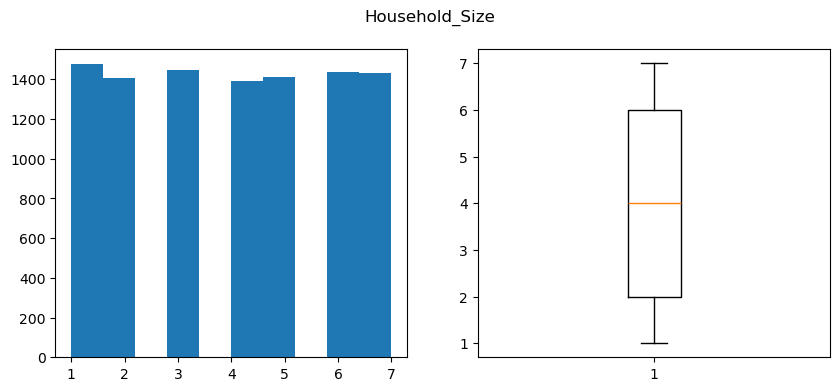

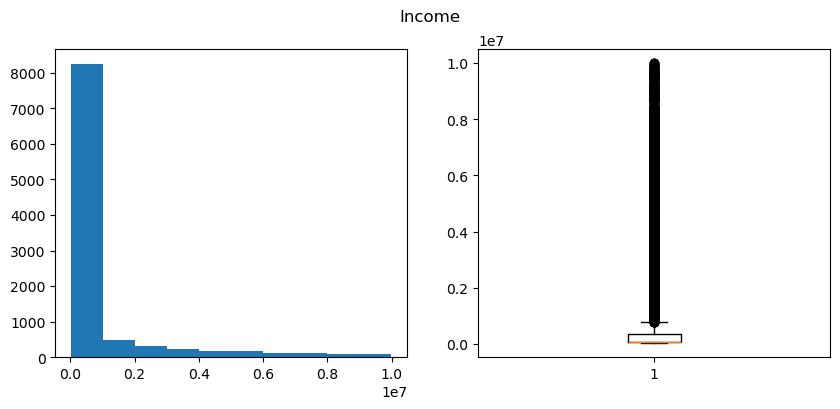

In [10]:
for i in num:
    fig, ax=plt.subplots(1,2, figsize=(10,4))
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

In [11]:
df['Education_Level'].value_counts().index

Index(['Bachelor's', 'High School', 'Master's', 'Doctorate'], dtype='object', name='Education_Level')

In [12]:
df['Education_Level'].replace(to_replace=["Bachelor's", 'High School', "Master's", 'Doctorate'],value=[1,0,2,3],inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_15752\2741946439.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_Level'].replace(to_replace=["Bachelor's", 'High School', "Master's", 'Doctorate'],value=[1,0,2,3],inplace=True)
C:\Users\kunal\AppData\Local\Temp\ipykernel_15752\2741946439.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.

In [13]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,2,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,0,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,1,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,0,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,1,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,2,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,3,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,0,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [14]:
df['Homeownership_Status'].replace(to_replace=['Own','Rent'], value=[1,0], inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_15752\178670920.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Homeownership_Status'].replace(to_replace=['Own','Rent'], value=[1,0], inplace=True)
C:\Users\kunal\AppData\Local\Temp\ipykernel_15752\178670920.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcastin

In [15]:
df['Gender'].replace(to_replace=['Male', 'Female'], value=[1,0], inplace=True)

C:\Users\kunal\AppData\Local\Temp\ipykernel_15752\2736561479.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(to_replace=['Male', 'Female'], value=[1,0], inplace=True)
C:\Users\kunal\AppData\Local\Temp\ipykernel_15752\2736561479.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

In [16]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,2,Technology,5,Urban,21,Married,Full-time,7,1,Apartment,1,Public transit,72510
1,69,0,Finance,0,Urban,4,Single,Full-time,7,1,Apartment,1,Biking,75462
2,46,1,Technology,1,Urban,1,Single,Full-time,7,1,Single-family home,0,Car,71748
3,32,0,Others,2,Urban,32,Married,Full-time,1,1,Apartment,0,Car,74520
4,60,1,Finance,3,Urban,15,Married,Self-employed,4,1,Townhouse,1,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,Others,0,Suburban,26,Divorced,Full-time,6,1,Townhouse,0,Car,74994
9996,23,2,Technology,3,Urban,16,Divorced,Full-time,1,1,Single-family home,0,Biking,72676
9997,41,3,Education,3,Urban,50,Single,Full-time,4,1,Single-family home,0,Public transit,2684820
9998,44,0,Education,0,Urban,3,Married,Part-time,1,1,Single-family home,1,Biking,57955


In [17]:
cat = []
num = []
for i in df.columns:
    if df[i].dtype=="O":
        cat.append(i)
    else:
        num.append(i)

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe_occupation = OneHotEncoder(sparse_output=False)
occupation_array = ohe_occupation.fit_transform(df[['Occupation']])
occupation_array

array([[0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [19]:
ohe_occupation.categories_[0]

array(['Education', 'Finance', 'Healthcare', 'Others', 'Technology'],
      dtype=object)

In [20]:
occupation_df = pd.DataFrame(occupation_array, columns= ohe_occupation.categories_[0])
occupation_df.drop('Education', axis=1, inplace=True)
occupation_df

,Finance,Healthcare,Others,Technology
0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
9995,0.0,0.0,1.0,0.0
9996,0.0,0.0,0.0,1.0
9997,0.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0


In [21]:
ohe_Marital_Status = OneHotEncoder(sparse_output=False)
Marital_Status_array = ohe_Marital_Status.fit_transform(df[['Marital_Status']])
Marital_Status_array

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [22]:
Marital_Status_df = pd.DataFrame(Marital_Status_array, columns= ohe_Marital_Status.categories_[0])
Marital_Status_df.drop('Divorced', axis=1, inplace=True)
Marital_Status_df

,Married,Single
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,1.0
9998,1.0,0.0


In [23]:
df[cat]
from sklearn.preprocessing import OneHotEncoder
ohe_Employment_Status = OneHotEncoder(sparse_output= False)
Employment_Status_array = ohe_Employment_Status.fit_transform(df[['Employment_Status']])
Employment_Status_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [24]:
Employment_Status_df = pd.DataFrame(Employment_Status_array, columns= ohe_Employment_Status.categories_[0])
Employment_Status_df.drop('Full-time', axis=1, inplace=True)
Employment_Status_df

,Part-time,Self-employed
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,1.0,0.0


In [25]:
ohe_Type_of_Housing = OneHotEncoder(sparse_output= False)
Type_of_Housing_array = ohe_Type_of_Housing.fit_transform(df[['Type_of_Housing']])
Type_of_Housing_array

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [26]:
Type_of_Housing_df = pd.DataFrame(Type_of_Housing_array, columns= ohe_Type_of_Housing.categories_[0])
Type_of_Housing_df.drop('Single-family home', axis=1, inplace=True)
Type_of_Housing_df

,Apartment,Townhouse
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
9995,0.0,1.0
9996,0.0,0.0
9997,0.0,0.0
9998,0.0,0.0


In [27]:
ohe_Primary_Mode_of_Transportation= OneHotEncoder(sparse_output= False)
Primary_Mode_of_Transportation_array= ohe_Primary_Mode_of_Transportation.fit_transform(df[['Primary_Mode_of_Transportation']])
Primary_Mode_of_Transportation_df= pd.DataFrame(Primary_Mode_of_Transportation_array,columns=ohe_Primary_Mode_of_Transportation.categories_[0])
Primary_Mode_of_Transportation_df.drop('Public transit',axis=1,inplace=True)
Primary_Mode_of_Transportation_df

,Biking,Car,Walking
0,0.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,0.0,1.0,0.0
9996,1.0,0.0,0.0
9997,0.0,0.0,0.0
9998,1.0,0.0,0.0


In [28]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,2,Technology,5,Urban,21,Married,Full-time,7,1,Apartment,1,Public transit,72510
1,69,0,Finance,0,Urban,4,Single,Full-time,7,1,Apartment,1,Biking,75462
2,46,1,Technology,1,Urban,1,Single,Full-time,7,1,Single-family home,0,Car,71748
3,32,0,Others,2,Urban,32,Married,Full-time,1,1,Apartment,0,Car,74520
4,60,1,Finance,3,Urban,15,Married,Self-employed,4,1,Townhouse,1,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,0,Others,0,Suburban,26,Divorced,Full-time,6,1,Townhouse,0,Car,74994
9996,23,2,Technology,3,Urban,16,Divorced,Full-time,1,1,Single-family home,0,Biking,72676
9997,41,3,Education,3,Urban,50,Single,Full-time,4,1,Single-family home,0,Public transit,2684820
9998,44,0,Education,0,Urban,3,Married,Part-time,1,1,Single-family home,1,Biking,57955


In [29]:
df.drop(cat, axis=1, inplace=True)

In [30]:
df

,Age,Education_Level,Number_of_Dependents,Work_Experience,Household_Size,Homeownership_Status,Gender,Income
0,56,2,5,21,7,1,1,72510
1,69,0,0,4,7,1,1,75462
2,46,1,1,1,7,1,0,71748
3,32,0,2,32,1,1,0,74520
4,60,1,3,15,4,1,1,640210
...,...,...,...,...,...,...,...,...
9995,58,0,0,26,6,1,0,74994
9996,23,2,3,16,1,1,0,72676
9997,41,3,3,50,4,1,0,2684820
9998,44,0,0,3,1,1,1,57955


In [31]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [32]:
x = pd.concat([x, occupation_df, Marital_Status_df, Employment_Status_df, Type_of_Housing_df, Primary_Mode_of_Transportation_df ], axis=1)

In [33]:
x = x.values
y = y.values

In [34]:
!pip install tensorflow

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [37]:
print(x_train.shape)
print(x_test.shape)

(8000, 20)
(2000, 20)


In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train= sc.fit_transform(x_train)
x_test= sc.transform(x_test)

In [39]:
model = Sequential()
model.add(Dense(64, input_dim = 20, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense (1))

C:\Users\kunal\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer = 'adam', loss='mse', metrics=['mse'])

In [41]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = 64, validation_split = 0.2)

Epoch 1/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3878492831744.0000 - mse: 3878492831744.0000 - val_loss: 4230872039424.0000 - val_mse: 4230872039424.0000
Epoch 2/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3673837797376.0000 - mse: 3673837797376.0000 - val_loss: 4223732809728.0000 - val_mse: 4223732809728.0000
Epoch 3/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4220936519680.0000 - mse: 4220936519680.0000 - val_loss: 4188271542272.0000 - val_mse: 4188271542272.0000
Epoch 4/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3746160181248.0000 - mse: 3746160181248.0000 - val_loss: 4092745482240.0000 - val_mse: 4092745482240.0000
Epoch 5/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3473677484032.0000 - mse: 3473677484032.0000 - val_loss: 3925229961216.0000 - val_mse: 3925229961216.0000
Epoch 6/200
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3506684559360.0000 - mse: 3506684559360.0000 - val_loss: 3737396969472.0000 - val_mse: 3737396969472.000

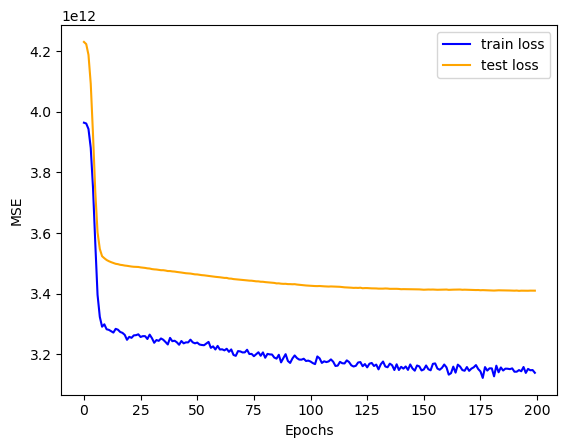

In [42]:
plt.plot(history.history['loss'],label= 'train loss',color= 'blue')
plt.plot(history.history['val_loss'],label= 'test loss',color= 'orange')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [43]:
y_train_pred=model.predict(x_train)

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


In [44]:
y_test_pred=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_train_train = mean_squared_error(y_train_pred, y_train)
rmse_train_train = mean_squared_error(y_train_pred , y_train) ** 0.5
mae_train_train = mean_absolute_error(y_train_pred, y_train)


print('Training MSE: ',mse_train_train)
print('Training RMSE: ',rmse_train_train)
print('Training MAE: ',mae_train_train)

print('---------------------------------------------------')

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse_test_test = mean_squared_error(y_test_pred, y_test)
rmse_test_test = mean_squared_error(y_test_pred , y_test) ** 0.5
mae_test_test = mean_absolute_error(y_test_pred, y_test)


print('Testing MSE: ',mse_test_test)
print('Testing RMSE:',rmse_test_test)
print('Testing MAE:',mae_test_test)

Training MSE:  3169780098782.099
Training RMSE:  1780387.6259910646
Training MAE:  1069951.655970703
---------------------------------------------------
Testing MSE:  3098918927264.312
Testing RMSE: 1760374.6553686552
Testing MAE: 1067984.380453125
